# [Heart Disease - Group 6]

###Group Members

*   Osman Kara *27809*
*   Şevki Aybars Türel *28238*
*   Emirhan Özdemir *28293*
*   Mehmet Eren Karabulut *28203*


## Introduction


<font color = "red"> 
RATIONALE OF PROJECT
</font>

 

*   The rationale of this project is to find out what kind of characteristics cause heart diseases by looking at the current characteristics of people who have had heart diseases in the past or who come to the hospital with the suspicion of having it.
Briefly discuss the background and the rationale of the project. In addition, by looking at the characteristics found, a method will be found to estimate how much risk people who apply to the hospital with the suspicion of heart disease are at.


<font color = "red"> 
BACKGROUND INFORMATION
</font>

*  According to the background information we have as members of the group, we know that the level of sugar in the blood, cholesterol value, gender and age play a role in heart diseases. In addition to these, we also learned that the resting blood pressure of the person, the tension after the exercise and the pain in the chest determine whether the person has a heart disease or not.


## Utilized Datasets

<font color="blue">
<font color="white">
 
 As a group, we will not use any datasets which are not given by instructors. We selected some of the datasets that were shared by instructros.

 ### Selected Datasets 


*   heart.csv -> https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 

* dataset.csv -> https://www.kaggle.com/datasets/mazharkarimi/heart-disease-and-stroke-prevention-> `This Dataset has been visualized.`

*   heart2.csv -> https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction -> `This Dataset has been visualized.`

*    dataset_for_symptoms.csv -> https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset?select=dataset.csv -> `This Dataset has been visualized.`

</font>




```
Installing Required Libraries
```


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from ipywidgets import interact
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#deleted library will be checked
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
import matplotlib.cbook as cbook
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)
path_prefix = './drive/My Drive'

Mounted at ./drive


# Exploratory Data Analysis
*   In this part we discussed data and edited them according to our needs. We determine outliers. We visualized data to direct our hypotheses. 

###<font color='red'> Exploration and Visualization of Dataset 1 **Heart.csv** </font>

*   In this part, Heart.csv will be explored and visualized by using various graphs.





In [ ]:
filename = "heart.csv"
df = pd.read_csv(join(path_prefix, filename))


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.shape

(918, 12)




*   By using shape method, we discovered our simple size for this dataset. 
Also we have 12 different characteristics for our sample dataset.






In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
def categorize(Age):
    if 0 <= Age < 18:
        return "Adolescent"
    elif 18 <= Age < 45:
        return "Young"
    elif 45 <= Age < 65:
        return "Middle-Aged"
    elif 65 <= Age:
        return "Elderly"

*   In this part of the visualization, we grouped patients' ages. This facilitate to make inferrence about how age affects heart disease. This intervals were taken from World Health Organization.

In [ ]:
df["AgeCategory"] = df["Age"].apply(categorize)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Young
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Middle-Aged
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Young
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,Middle-Aged
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,Middle-Aged


*   In this section, AgeCategory column has been added to dataset by using Categorize function. It categorized patients according to their ages. 

In [ ]:
dfCopy = df.copy()
dfCopy["Cholesterol"].replace(0, np.nan, inplace=True)
dfCopy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,Young
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Middle-Aged
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,Young
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,Middle-Aged
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,Middle-Aged


*    In this piece of code, Cholesterol values with 0 has been changed with nan values because it is impossible to have 0 value for Cholesterol. This also make possible to use histogram because histogram method do not include nan values.   

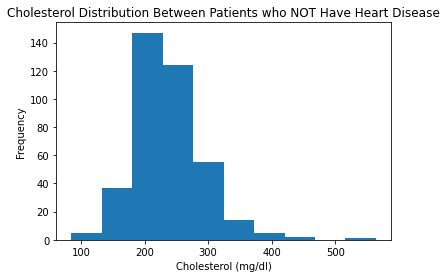

In [ ]:
df2Copy = dfCopy[dfCopy["HeartDisease"] < 1]
ax = df2Copy["Cholesterol"].plot.hist()
ax.set_title("Cholesterol Distribution Between Patients who NOT Have Heart Disease")
ax.set_xlabel("Cholesterol (mg/dl)")
plt.show()

*    This histogram shows the distribution of cholesterol (mm/dl) by including Patients who do *NOT* have Heart Disease Diagnosis. In dataset 0's are used to represent patients without Heart Disease Diagnosis. `df2Copy represents Dataset which is not include 0 values for Cholesterol Attribute and NOT having heart disease`

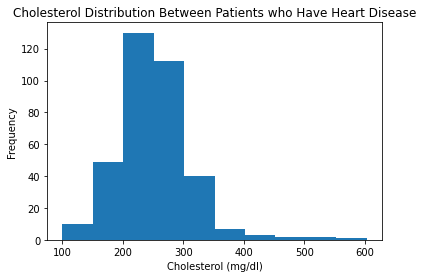

In [ ]:
df1Copy = dfCopy[dfCopy["HeartDisease"] > 0]
ax = df1Copy["Cholesterol"].plot.hist()
ax.set_title("Cholesterol Distribution Between Patients who Have Heart Disease")
ax.set_xlabel("Cholesterol (mg/dl)")
plt.show()

*    This histogram shows the distribution of Cholesterol (mm/dl) by including Patients who have Heart Disease Diagnosis. In dataset 1's are used to represent patients without Heart Disease Diagnosis. `df1Copy represents Dataset which is not include 0 values for Cholesterol Attribute and having heart disease`

*   These histograms help us to understand that which interval of cholesterol value play role in Heart Disease by comparing cholesterol values.


In [ ]:
df.drop(columns = ['Oldpeak','ST_Slope'], inplace=True)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,AgeCategory
0,40,M,ATA,140,289,0,Normal,172,N,0,Young
1,49,F,NAP,160,180,0,Normal,156,N,1,Middle-Aged
2,37,M,ATA,130,283,0,ST,98,N,0,Young
3,48,F,ASY,138,214,0,Normal,108,Y,1,Middle-Aged
4,54,M,NAP,150,195,0,Normal,122,N,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1,Middle-Aged
914,68,M,ASY,144,193,1,Normal,141,N,1,Elderly
915,57,M,ASY,130,131,0,Normal,115,Y,1,Middle-Aged
916,57,F,ATA,130,236,0,LVH,174,N,1,Middle-Aged


*    **Oldpeak** and **ST_Slope** columns have been deleted from daatset because these attributes will not be used in our Data Processing.  

<font color="red">**Some General Information About Columns and Their Meanings**</font>

*   RestingBP -> It represents the blood pressure of patient in resting condition.
<br>
*   MaxHR -> It represents the heart rate of patient under high level of stress
<br>
*   ChestPainType -> It represents chest pain type of patient. There are four different type of pain.
> * TA: Typical Angina 
> * ATA: Atypical Angina
> * NAP: Non-Anginal Pain
> * ASY: Asymptomatic
<br>
*   ExerciseAngina -> It represent the disorder in heart rate in exercise condition by Y(Yes)/N(No).
*   FastingBS -> It represents that the patient has the fasting blood sugar(diabetes) or not by 1(there is) and 0(there is not)   




In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,AgeCategory
0,40,M,ATA,140,289,0,Normal,172,N,0,Young
1,49,F,NAP,160,180,0,Normal,156,N,1,Middle-Aged
2,37,M,ATA,130,283,0,ST,98,N,0,Young
3,48,F,ASY,138,214,0,Normal,108,Y,1,Middle-Aged
4,54,M,NAP,150,195,0,Normal,122,N,0,Middle-Aged
5,39,M,NAP,120,339,0,Normal,170,N,0,Young
6,45,F,ATA,130,237,0,Normal,170,N,0,Middle-Aged
7,54,M,ATA,110,208,0,Normal,142,N,0,Middle-Aged
8,37,M,ASY,140,207,0,Normal,130,Y,1,Young
9,48,F,ATA,120,284,0,Normal,120,N,0,Middle-Aged


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'HeartDisease', 'AgeCategory'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   HeartDisease    918 non-null    int64 
 10  AgeCategory     918 non-null    object
dtypes: int64(6), object(5)
memory usage: 79.0+ KB


*   In the previous three lines of code, the final version of the dataset after the deleted and added columns is shown.

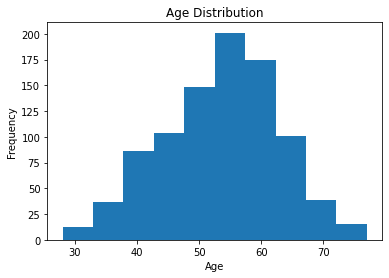

In [ ]:
ax = df["Age"].plot.hist()
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
plt.show()

*   In this part, we visualized age distribution of our research group by including both having Heart Disease Diagnose and not having Heart Disease Diagnose.

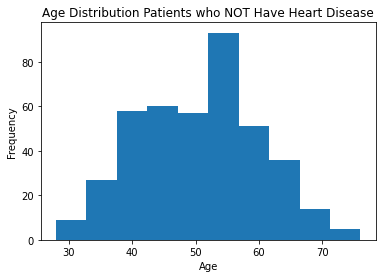

In [ ]:
df2 = df[df["HeartDisease"] == 0]
ax = df2["Age"].plot.hist()
ax.set_title("Age Distribution Patients who NOT Have Heart Disease")
ax.set_xlabel("Age")
plt.show()

*   In this part, we just visualized age distribution who have NOT heart disease.

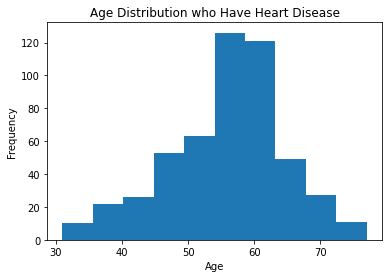

In [ ]:
df1 = df[df["HeartDisease"] > 0]
ax = df1["Age"].plot.hist()
ax.set_title("Age Distribution who Have Heart Disease")
ax.set_xlabel("Age")
plt.show()

*   In this part, we just visualized age distribution who have heart disease.
*   After comparision of both histogram, we can observe that patients with heart disease are found at an older age.  

In [ ]:
df1.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,AgeCategory
1,49,F,NAP,160,180,0,Normal,156,N,1,Middle-Aged
3,48,F,ASY,138,214,0,Normal,108,Y,1,Middle-Aged
8,37,M,ASY,140,207,0,Normal,130,Y,1,Young
11,58,M,ATA,136,164,0,ST,99,Y,1,Middle-Aged
13,49,M,ASY,140,234,0,Normal,140,Y,1,Middle-Aged


In [ ]:
df2.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease,AgeCategory
0,40,M,ATA,140,289,0,Normal,172,N,0,Young
2,37,M,ATA,130,283,0,ST,98,N,0,Young
4,54,M,NAP,150,195,0,Normal,122,N,0,Middle-Aged
5,39,M,NAP,120,339,0,Normal,170,N,0,Young
6,45,F,ATA,130,237,0,Normal,170,N,0,Middle-Aged


*    df1 have patient with Heart Disease (1).
*    df2 have patient without Heart Disease (0).

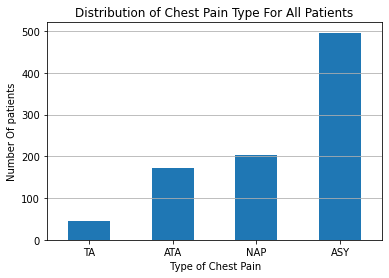

In [ ]:
ax = df["ChestPainType"].value_counts()[["TA", "ATA", "NAP","ASY"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Type of Chest Pain')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of Chest Pain Type For All Patients')
ax.grid(axis='y');

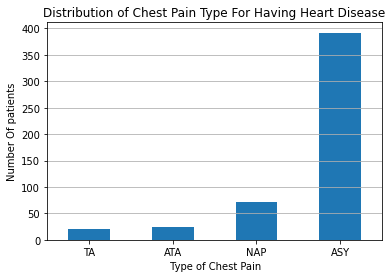

In [ ]:
ax = df1["ChestPainType"].value_counts()[["TA", "ATA", "NAP","ASY"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Type of Chest Pain')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of Chest Pain Type For Having Heart Disease')
ax.grid(axis='y');

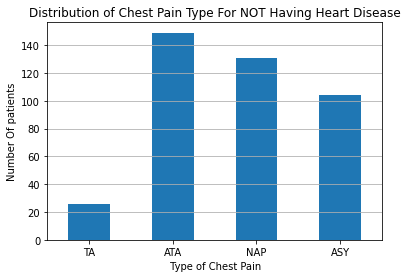

In [ ]:
ax = df2["ChestPainType"].value_counts()[["TA", "ATA", "NAP","ASY"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Type of Chest Pain')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of Chest Pain Type For NOT Having Heart Disease')
ax.grid(axis='y');

*    According to visualization of chest pain types, we can infer that ATA and NAP Chest Pain Type is not decisive for having Heart disease because most of the people who do not have Heart Disease suffered from these pain. However, most of the patients who have ASY chest pain type have diagnosis for Heart Disease.

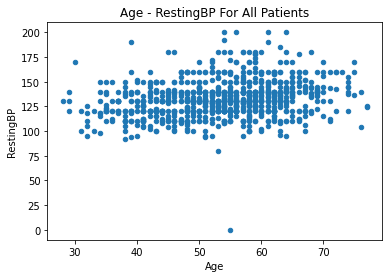

In [ ]:
ax = df[["Age", "RestingBP"]].plot.scatter(x="Age", y="RestingBP", s=20)  # s-> marker size
ax.set_title("Age - RestingBP For All Patients")
plt.show()

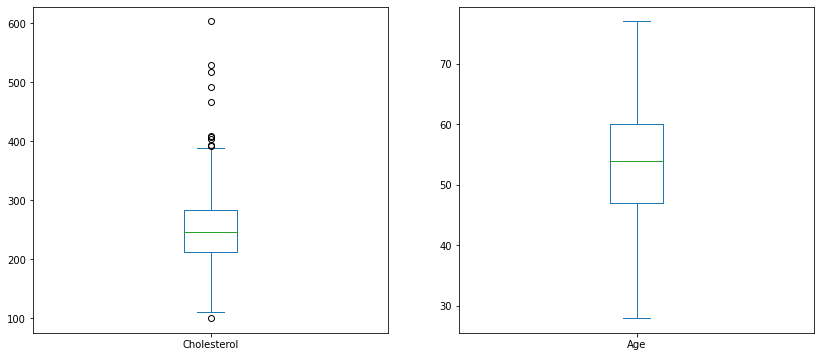

In [ ]:
fig, ax = plt.subplots( 1,2, figsize=(14,6))
#df["Cholesterol"].plot(kind="box", ax=ax[0])
df["Age"].plot(kind="box", ax=ax[1])
df1Copy["Cholesterol"].plot(kind="box", ax=ax[0])

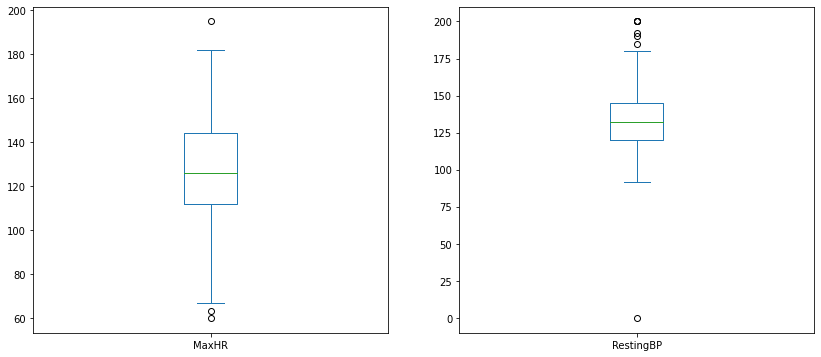

In [ ]:
fig, ax = plt.subplots( 1,2, figsize=(14,6))
df1Copy["MaxHR"].plot(kind="box", ax=ax[0])
df1Copy["RestingBP"].plot(kind="box", ax=ax[1])

*   This is boxplot which includes all patients.

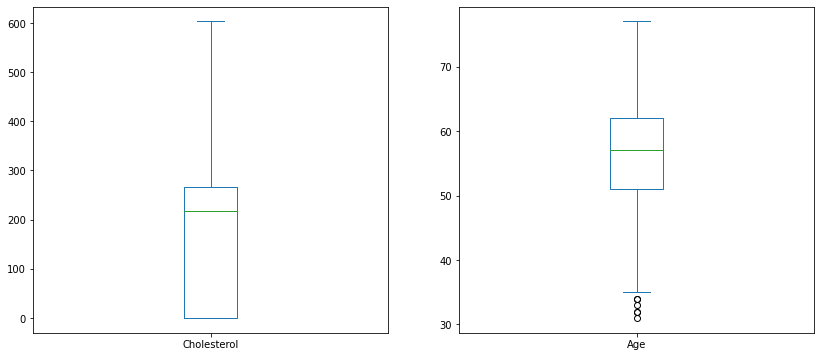

In [ ]:
fig, ax = plt.subplots( 1,2, figsize=(14,6))
df1["Cholesterol"].plot(kind="box", ax=ax[0])
df1["Age"].plot(kind="box", ax=ax[1])

*   This is boxplot which includes patients with Heart Disease.

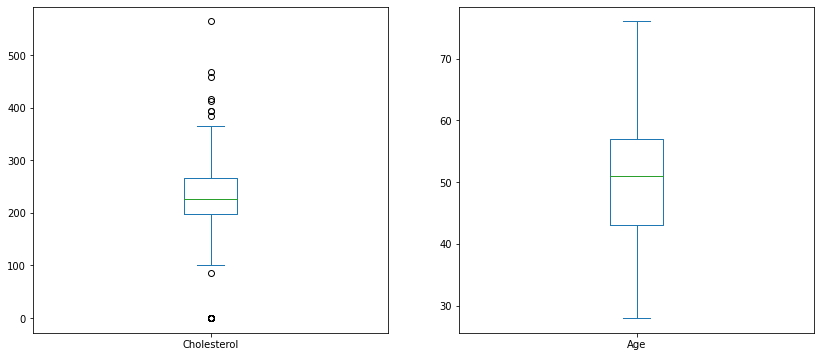

In [ ]:
fig, ax = plt.subplots( 1,2, figsize=(14,6))
df2["Cholesterol"].plot(kind="box", ax=ax[0])
df2["Age"].plot(kind="box", ax=ax[1])

*   This is boxplot which includes patients with **NOT** Heart Disease.

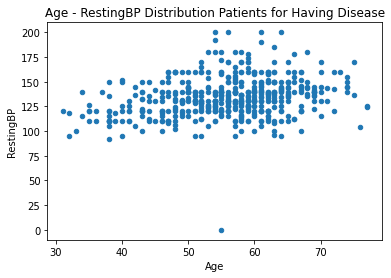

In [ ]:
ax = df1[["Age", "RestingBP"]].plot.scatter(x="Age", y="RestingBP", s=20)  # s-> marker size
ax.set_title("Age - RestingBP Distribution Patients for Having Disease")
plt.show()

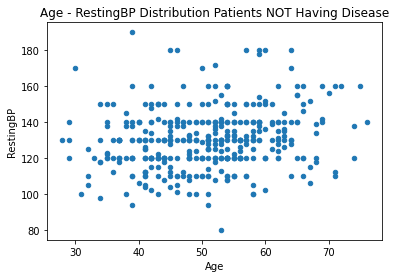

In [ ]:
ax = df2[["Age", "RestingBP"]].plot.scatter(x="Age", y="RestingBP", s=20)  # s-> marker size
ax.set_title("Age - RestingBP Distribution Patients NOT Having Disease")
plt.show()

*   According to comparision Age-RestingBP, patients with Heart Disease Diognise have more RestingBP value than patients without Heart Disease. It can be conclude that if people have higher RestingBP, they are tend to have Heart Disease.

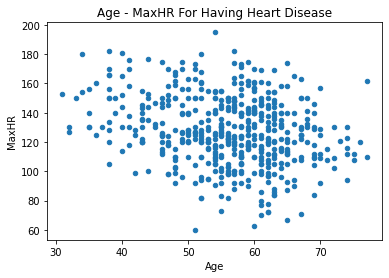

In [ ]:
ax = df1[["Age", "MaxHR"]].plot.scatter(x="Age", y="MaxHR", s=20)  # s-> marker size
ax.set_title("Age - MaxHR For Having Heart Disease")
plt.show()

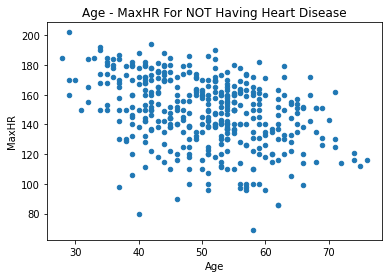

In [ ]:
ax = df2[["Age", "MaxHR"]].plot.scatter(x="Age", y="MaxHR", s=20)  
ax.set_title("Age - MaxHR For NOT Having Heart Disease")
plt.show()

*    According to comparison of both scatter plot, we can infer that MaxHR is not critical for having Heart Disease because both distributions almost overlap.

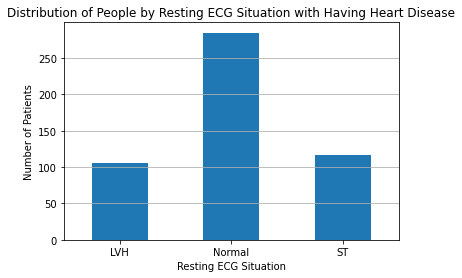

In [ ]:
ax = df1["RestingECG"].value_counts()[["LVH", "Normal", "ST"]].plot(kind="bar", rot=0)
ax.set_xlabel('Resting ECG Situation')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of People by Resting ECG Situation with Having Heart Disease')
ax.grid(axis='y');

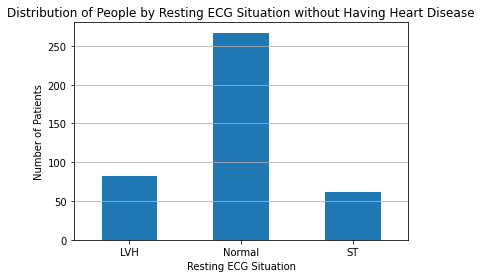

In [ ]:
ax = df2["RestingECG"].value_counts()[["LVH", "Normal", "ST"]].plot(kind="bar", rot=0)
ax.set_xlabel('Resting ECG Situation')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of People by Resting ECG Situation without Having Heart Disease')
ax.grid(axis='y');

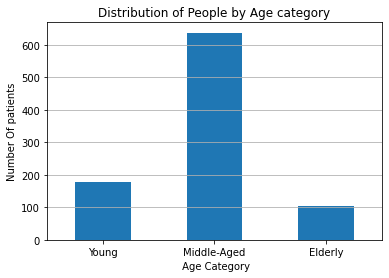

In [ ]:
ax = df["AgeCategory"].value_counts()[["Young", "Middle-Aged", "Elderly"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Age Category')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of People by Age category')
ax.grid(axis='y');

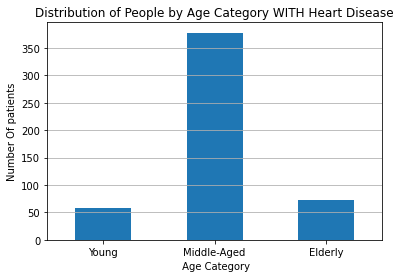

In [ ]:
ax = df1["AgeCategory"].value_counts()[["Young", "Middle-Aged", "Elderly"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Age Category')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of People by Age Category WITH Heart Disease')
ax.grid(axis='y');

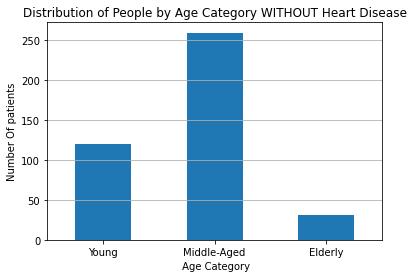

In [ ]:
ax = df2["AgeCategory"].value_counts()[["Young", "Middle-Aged", "Elderly"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Age Category')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of People by Age Category WITHOUT Heart Disease')
ax.grid(axis='y');

*    <font color="red">**YOUNG:**</font> When we compared both histogram, a very low proportion of young people who come with heart disease complaints have been diagnosed with heart disease. Based on this, it can be deduced that the probability of heart disease in youth is low.  

*    <font color="red">**MIDDLE-AGED:**</font> When these two graphs are compared, it can be deduced that almost half of the middle-aged people who come with heart disease have heart disease.

*    <font color="red">**ELDERLY:**</font> It can be said that the majority of people marked as elderly in the age category are diagnosed with heart disease.

<br>

```
 As a result, when age increases, the probability of having heart disease increases.
```



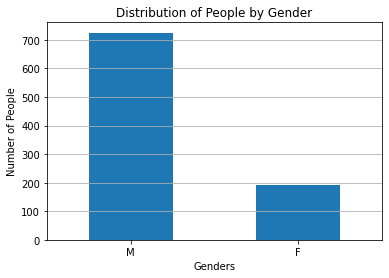

In [ ]:
ax = df["Sex"].value_counts()[["M", "F"]].plot(kind="bar", rot=0)
ax.set_xlabel('Genders')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of People by Gender')
ax.grid(axis='y');

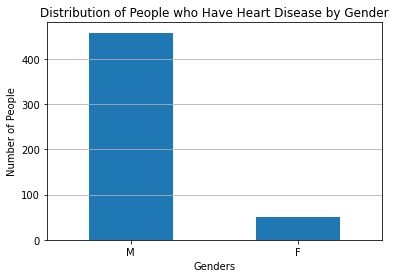

In [ ]:
ax = df1["Sex"].value_counts()[["M", "F"]].plot(kind="bar", rot=0)
ax.set_xlabel('Genders')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of People who Have Heart Disease by Gender')
ax.grid(axis='y');

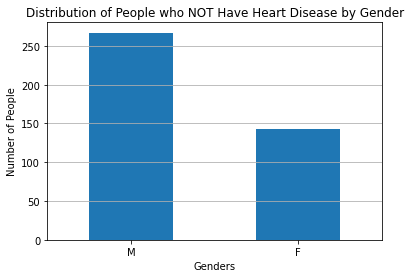

In [ ]:
ax = df2["Sex"].value_counts()[["M", "F"]].plot(kind="bar", rot=0)
ax.set_xlabel('Genders')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of People who NOT Have Heart Disease by Gender')
ax.grid(axis='y');

*   According to graph, we can infer that male people tend to having heart disase more than female.

In [ ]:
class_group = df.groupby(by="AgeCategory")
class_group["RestingBP"].mean()


AgeCategory
Elderly        139.572816
Middle-Aged    133.337520
Young          124.876404
Name: RestingBP, dtype: float64

*   In this part of the code, we have found the mean of whole patients' Resting BP.

In [ ]:
class_group = df1.groupby(by="AgeCategory")
class_group["RestingBP"].mean()


AgeCategory
Elderly        140.527778
Middle-Aged    134.941799
Young          121.379310
Name: RestingBP, dtype: float64

*   In this part of the code, we have found the mean of patients' who have heart disease Resting BP.

In [ ]:
class_group = df2.groupby(by="AgeCategory")
class_group["RestingBP"].mean()

AgeCategory
Elderly        137.354839
Middle-Aged    130.996139
Young          126.566667
Name: RestingBP, dtype: float64

*   In this part of the code, we have found the mean of patients' who DO NOT have heart disease Resting BP.

*   As a result of comprasion of this information, we can infer the followings;

*    <font color="red">**YOUNG:**</font> It has been shown that the resting blood pressure of the diseased youth is lower than that of the normal youth. 

*    <font color="red">**MIDDLE-AGED:**</font> For middle aged patients, higher Resting Blood Pressure can be distinctive in deciding having Heart Disease or not. 

*    <font color="red">**ELDERLY:**</font> For elderly patients, higher Resting Blood Pressure can be distinctive in deciding having Heart Disease or not. 

<br>

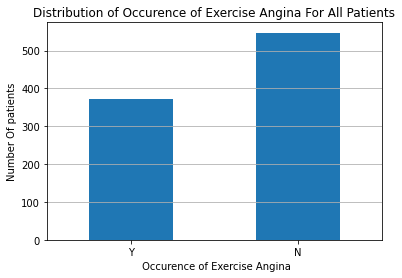

In [ ]:
ax = df["ExerciseAngina"].value_counts()[["Y", "N"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Occurence of Exercise Angina')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of Occurence of Exercise Angina For All Patients')
ax.grid(axis='y');

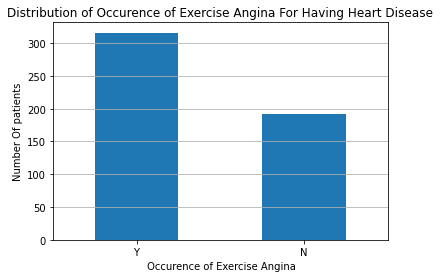

In [ ]:
ax = df1["ExerciseAngina"].value_counts()[["Y", "N"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Occurence of Exercise Angina')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of Occurence of Exercise Angina For Having Heart Disease')
ax.grid(axis='y');

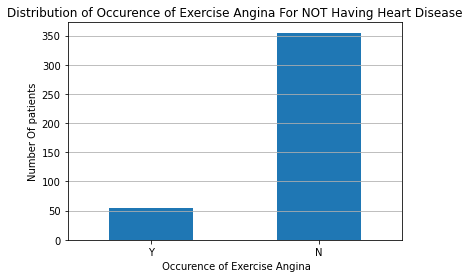

In [ ]:
ax = df2["ExerciseAngina"].value_counts()[["Y", "N"]].plot(kind="bar", rot=0)
ax.set_xlabel(' Occurence of Exercise Angina')
ax.set_ylabel('Number Of patients')
ax.set_title('Distribution of Occurence of Exercise Angina For NOT Having Heart Disease')
ax.grid(axis='y');

*    As a result of the comparision, we can conclude that having an exercise angina can be distinguished characteristic for heart disease.

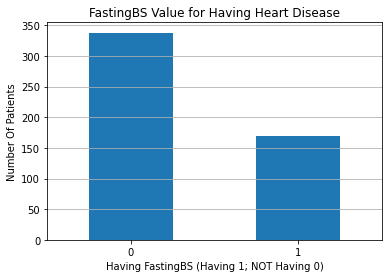

In [ ]:
ax = df1["FastingBS"].value_counts()[[0, 1]].plot(kind="bar", rot=0)
ax.set_xlabel('Having FastingBS (Having 1; NOT Having 0)')
ax.set_ylabel('Number Of Patients')
ax.set_title('FastingBS Value for Having Heart Disease')
ax.grid(axis='y');

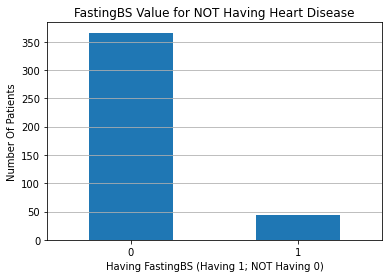

In [ ]:
ax = df2["FastingBS"].value_counts()[[0, 1]].plot(kind="bar", rot=0)
ax.set_xlabel('Having FastingBS (Having 1; NOT Having 0)')
ax.set_ylabel('Number Of Patients')
ax.set_title('FastingBS Value for NOT Having Heart Disease')
ax.grid(axis='y');

*   After the comparison of both graph, we can conclude that Having FastingBS plays crucial role in having Heart Disease Diagnosis.

###<font color='red'> Exploration and Visualization of Dataset 2 **dataset_for_symptoms.csv** </font>

*   In this part, dataset_for_symptoms.csv will be explored and visualized by using various graphs.

*   <font color='red'> NOTE: <font color='white'> In this section we detected the most common three symptoms who have heart disease. However, in this dataframe all of the symptoms for people who have heart disease so we could not able to analyze the distribution of this symptom on people who did not have heart disease.  

In [ ]:
filename = "dataset_for_symptoms.csv"
df_for_symptoms = pd.read_csv(join(path_prefix, filename))

In [ ]:
df_for_symptoms.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

In [ ]:
df_for_symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df_for_symptoms.shape

(4920, 18)

In [ ]:
df_for_symptoms.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*    In this dataset, we can observe that there are various disease with their several symptomps. We will take the first three symptoms in order to make inference about the most common symptoms of diseases. We detected that the first three symptoms has been filled fully. Therefore, we chhose the first third symptoms to analyze.

In [ ]:
df_for_symptoms_3_symptomps = df_for_symptoms[['Disease','Symptom_1','Symptom_2','Symptom_3']]

In [ ]:
df_for_symptoms_3_symptomps.head(15)

,Disease,Symptom_1,Symptom_2,Symptom_3
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches
3,Fungal infection,itching,skin_rash,dischromic _patches
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches
7,Fungal infection,itching,skin_rash,dischromic _patches
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions


In [ ]:
df5 = df_for_symptoms_3_symptomps.set_index("Disease")

In [ ]:
df5.index

Index(['Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection',
       ...
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
       'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],
      dtype='object', name='Disease', length=4920)

In [ ]:
df6 = df5.loc["Heart attack"]
df6

,Symptom_1,Symptom_2,Symptom_3
Disease,,,
Heart attack,vomiting,breathlessness,sweating
Heart attack,vomiting,breathlessness,sweating
Heart attack,breathlessness,sweating,chest_pain
Heart attack,vomiting,sweating,chest_pain
Heart attack,vomiting,breathlessness,chest_pain
...,...,...,...
Heart attack,vomiting,breathlessness,sweating
Heart attack,vomiting,breathlessness,sweating
Heart attack,vomiting,breathlessness,sweating


In [ ]:
pd.set_option('display.float_format', '{:.2%}'.format)
ax = df6["Symptom_1"].value_counts(normalize = True)
ax

 vomiting         90.00%
 breathlessness   10.00%
Name: Symptom_1, dtype: float64

In [ ]:
pd.set_option('display.float_format', '{:.2%}'.format)
ax = df6["Symptom_2"].value_counts(normalize = True)
ax

 breathlessness   80.00%
 sweating         20.00%
Name: Symptom_2, dtype: float64

In [ ]:
pd.set_option('display.float_format', '{:.2%}'.format)
ax = df6["Symptom_3"].value_counts(normalize = True)
ax

 sweating     70.00%
 chest_pain   30.00%
Name: Symptom_3, dtype: float64

*    In this part, We used set_index method to get the rows with Heart attack. After taking rows, we calculated the percentage of symptoms.
<br> 
  As a result,
<br>
    -> <font color='red'> The First Common Symptom: <font color = 'default'>90% of patients notified that they are vommiting.
    <br>
   <font color='white'> -> <font color='red'> The Second Common Symptom: <font color = 'default'>80% of patients notified that they were struggling with breathlessnes.
   <br>
   <font color='white'> -> <font color='red'> The Third Common Symptom: <font color = 'default'>70% of patients notified that they were struggling with sweating.

We will use machine learning methods to show which these symptoms are decisive for heart attack. 
  



###<font color='red'> Exploration and Visualization of Dataset 3 **dataset.csv** </font>
*   <font color='white'> In this part, dataset.csv will be explored and visualized by using various graphs.
*   <font color='red'> NOTE: <font color='white'>In this section, we analyzed effect of race on Heart Disease. However, all races equally tend to have heart disease. We did not want to use randomization because it will make our study biased. Therefore, we decided to not include this part in Hypothesis Testing and Machine Learning.



```
AS A CONCLUSION RACE EFFECT ON HEART DISEASE NOT A TOPIC OF THIS STUDY DUE TO THE EQUALITY ON DATAFRAME.
```



In [ ]:
filename = "dataset.csv"
dfSymptom = pd.read_csv(join(path_prefix, filename))


In [ ]:
dfSymptom.head(10)

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"
5,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Female,C1,T1,BR001,Crude,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"
6,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,18-24,C1,T1,BR001,Crude,BOC03,AGE01,1,"(32.84057112200048, -86.63186076199969)"
7,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,25-44,C1,T1,BR001,Crude,BOC03,AGE04,1,"(32.84057112200048, -86.63186076199969)"
8,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,45-64,C1,T1,BR001,Crude,BOC03,AGE05,1,"(32.84057112200048, -86.63186076199969)"
9,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,65+,C1,T1,BR001,Crude,BOC03,AGE06,1,"(32.84057112200048, -86.63186076199969)"


In [ ]:
dfSymptomCopy = dfSymptom[dfSymptom["Break_Out_Category"] == "Race"]
dfSymptomCopy

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
12,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic White,C1,T1,BR001,Crude,BOC04,RAC01,1,"(32.84057112200048, -86.63186076199969)"
13,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic White,C1,T1,BR001,AgeStdz,BOC04,RAC01,1,"(32.84057112200048, -86.63186076199969)"
14,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Black,C1,T1,BR001,AgeStdz,BOC04,RAC02,1,"(32.84057112200048, -86.63186076199969)"
15,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Black,C1,T1,BR001,Crude,BOC04,RAC02,1,"(32.84057112200048, -86.63186076199969)"
16,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Asian,C1,T1,BR001,AgeStdz,BOC04,RAC03,1,"(32.84057112200048, -86.63186076199969)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Non-Hispanic Asian,C2,T9,BR012,AgeStdz,BOC04,RAC03,58,NaN
85796,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Hispanic,C2,T9,BR012,AgeStdz,BOC04,RAC04,58,NaN
85797,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Hispanic,C2,T9,BR012,Crude,BOC04,RAC04,58,NaN
85798,2015,USM,Median of all states,BRFSS,None,None,Healthy People 2020,None,Risk Factors,Hypertension,...,Race,Other,C2,T9,BR012,Crude,BOC04,RAC07,58,NaN


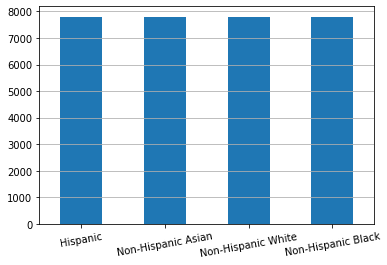

In [ ]:
ax = dfSymptomCopy["Break_out"].value_counts()[["Hispanic", "Non-Hispanic Asian", "Non-Hispanic White","Non-Hispanic Black"]].plot(kind="bar", rot=10)
ax.grid(axis='y');

In [ ]:
dfSymptomCopy["Break_out"].value_counts()

Non-Hispanic White    7800
Non-Hispanic Black    7800
Non-Hispanic Asian    7800
Hispanic              7800
Other                 7800
Name: Break_out, dtype: int64

In [ ]:
dfSymptomCopy = dfSymptomCopy.set_index("Category")
dfSymptomCopy2 = dfSymptomCopy.loc["Cardiovascular Diseases"]
dfSymptomCopy2

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Topic,Indicator,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
Category,,,,,,,,,,,,,,,,,,,,,
Cardiovascular Diseases,2011,AL,Alabama,BRFSS,None,None,None,None,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,...,Race,Non-Hispanic White,C1,T1,BR001,Crude,BOC04,RAC01,1,"(32.84057112200048, -86.63186076199969)"
Cardiovascular Diseases,2011,AL,Alabama,BRFSS,None,None,None,None,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,...,Race,Non-Hispanic White,C1,T1,BR001,AgeStdz,BOC04,RAC01,1,"(32.84057112200048, -86.63186076199969)"
Cardiovascular Diseases,2011,AL,Alabama,BRFSS,None,None,None,None,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,...,Race,Non-Hispanic Black,C1,T1,BR001,AgeStdz,BOC04,RAC02,1,"(32.84057112200048, -86.63186076199969)"
Cardiovascular Diseases,2011,AL,Alabama,BRFSS,None,None,None,None,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,...,Race,Non-Hispanic Black,C1,T1,BR001,Crude,BOC04,RAC02,1,"(32.84057112200048, -86.63186076199969)"
Cardiovascular Diseases,2011,AL,Alabama,BRFSS,None,None,None,None,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,...,Race,Non-Hispanic Asian,C1,T1,BR001,AgeStdz,BOC04,RAC03,1,"(32.84057112200048, -86.63186076199969)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cardiovascular Diseases,2015,USM,Median of all states,BRFSS,Million Hearts,None,None,None,Stroke,Prevalence of stroke among US adults (18+); BRFSS,...,Race,Non-Hispanic Asian,C1,T6,BR005,AgeStdz,BOC04,RAC03,58,NaN
Cardiovascular Diseases,2015,USM,Median of all states,BRFSS,Million Hearts,None,None,None,Stroke,Prevalence of stroke among US adults (18+); BRFSS,...,Race,Hispanic,C1,T6,BR005,AgeStdz,BOC04,RAC04,58,NaN
Cardiovascular Diseases,2015,USM,Median of all states,BRFSS,Million Hearts,None,None,None,Stroke,Prevalence of stroke among US adults (18+); BRFSS,...,Race,Hispanic,C1,T6,BR005,Crude,BOC04,RAC04,58,NaN


In [ ]:
dfSymptomCopy2["Break_out"].value_counts()

Non-Hispanic White    2600
Non-Hispanic Black    2600
Non-Hispanic Asian    2600
Hispanic              2600
Other                 2600
Name: Break_out, dtype: int64

*    In this part, we discovered the race of patients with heart disease. When we observe the data, we can infer that the race has almost no effect on having heart disease.

# Statistical Analysis & Hypothesis Testing
*   In this part of the project, as a group we will create come hypothesis to prove and make some test to show whether this hypothesis are correct or not.

* <font color="red">**IMPORTANT NOTE:**<font color="white"> In this project, we will take level of significance ($\alpha$) will be taken as 0.05.



 ## <font color="red"> 1.Hypothesis: AGE
 <br>
 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): The mean of patient who have heart disease is equal to 50 years old.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): The mean of patient who have heart disease is higher than 50 years old.

In [ ]:
ageOfHeartDisease = df[df["HeartDisease"] == 1]["Age"]  
ageOfNoHeartDisease = df[df["HeartDisease"] == 0]["Age"]

In [ ]:
ageOfHeartDisease

1      49
3      48
8      37
11     58
13     49
       ..
912    57
913    45
914    68
915    57
916    57
Name: Age, Length: 508, dtype: int64

In [ ]:
ageOfNoHeartDisease

0      40
2      37
4      54
5      39
6      45
       ..
903    56
904    56
906    55
910    41
917    38
Name: Age, Length: 410, dtype: int64

In [ ]:
ageOfHeartDisease.mean()

55.8996062992126

In [ ]:
ageOfNoHeartDisease.mean()

50.551219512195125

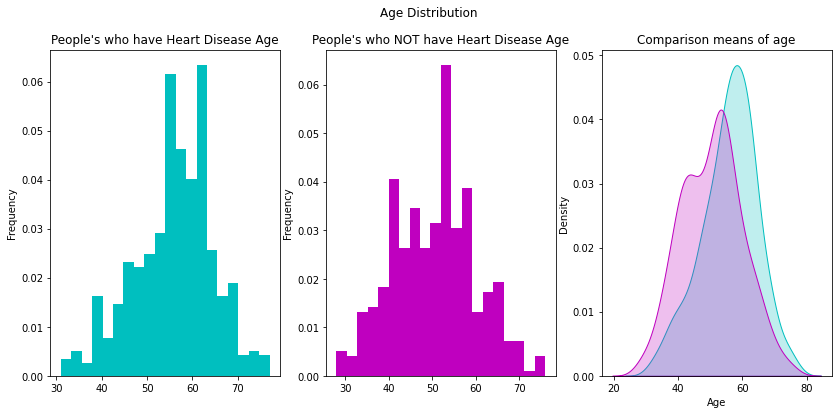

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
ageOfHeartDisease.plot(kind="hist", ax=ax[0], bins=20, label="People's who have Heart Disease Age ", color="c", density=True)
ax[0].set_title("People's who have Heart Disease Age")

ageOfNoHeartDisease.plot(kind="hist", ax=ax[1], bins=20, label="People's who NOT have Heart Disease Age", color="m", density=True)
ax[1].set_title("People's who NOT have Heart Disease Age")

sns.kdeplot(ageOfHeartDisease, shade=True, label="People's who have Heart Disease Age", ax=ax[2], color="c")
sns.kdeplot(ageOfNoHeartDisease, shade=True, label="People's who NOT have Heart Disease Age", ax=ax[2], color="m")
ax[2].set_title("Comparison means of age")

plt.suptitle("Age Distribution")
plt.show()

In [ ]:
stats.ttest_ind(ageOfHeartDisease, ageOfNoHeartDisease, equal_var=False)

Ttest_indResult(statistic=8.822540108922915, pvalue=6.3483366558258026e-18)

ACCORDING TO RESULT; 

<br><font color = red> T-Test

<font color = white> 
p-value = 6.3483366558258026e-18  
Level of Significance = 0.05
<br>
<br>
<br>
P-VALUE(6.3483366558258026e-18) <= ALFA(0.05)
<br>

<br>
<br>
<br>

*  In our research, we tried to determine how age has a decisive effect on whether people have heart disease or not. In order to determine this claim, we stated that the group of people with an average age of 50 did not have heart disease as the Null hypothesis. As an alternative hypothesis, we claimed that the group with an average age of over 50 may be more prone to heart disease. We tested this claim statistically with the t-test.

*   Using the t-test, we compared the mean age of people with the disease with the mean age of people without the disease. In this test, we observed how high and graphically discrete the average age of those with the disease was compared to those without disease.

*   Based on the graph, we concluded that the null hypothesis was wrong because the mean age of people who have heart disease was considerably bigger than 50 years. 

* However, considering that this graph would not be enough, we applied the t-test. Our reason for choosing the t-test was that we could find the p-value by comparing the mean age values of the two groups (with and without the disease) thanks to this test.

* According to graph and P-VALUE <= ALFA conclusion, we rejected our Null Hypothesis and accepted Alternative Hypothesis.



```
The group who have mean of age higher than 50 years tend to have heart disease
```



 ## <font color="red"> 2.Hypothesis: GENDER

 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): There is no difference between men and women in terms of having a heart disease.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): People of the male gender are more likely to have heart disease.

In [ ]:
crosstab_dfSex = pd.crosstab(df["Sex"], df["HeartDisease"])
crosstab_dfSex

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


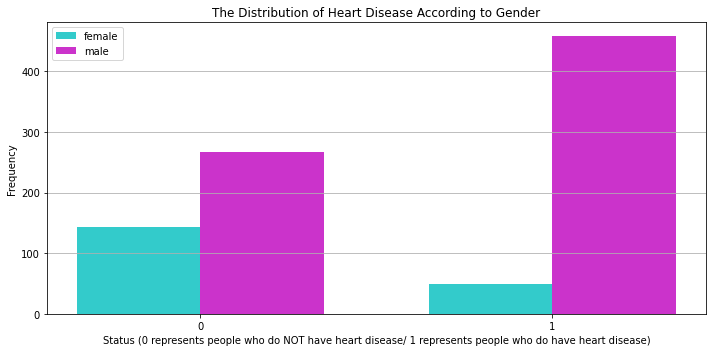

In [ ]:
female = crosstab_dfSex.loc["M"]
male = crosstab_dfSex.loc["F"]

fig, ax = plt.subplots(1, 1, figsize=(10,5))

index = np.arange(crosstab_dfSex.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, crosstab_dfSex.loc["F"], bar_width,
    alpha=opacity,
    color='c',
    label='female')
 
rects2 = plt.bar(index + bar_width, crosstab_dfSex.loc["M"], bar_width,
    alpha=opacity,
    color='m',
    label='male')
 
plt.ylabel("Frequency")
plt.title("The Distribution of Heart Disease According to Gender")
plt.grid(axis="y")
plt.xlabel('Status (0 represents people who do NOT have heart disease/ 1 represents people who do have heart disease)')
plt.xticks(index + (bar_width / 2), crosstab_dfSex.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_dfSex)

result = "ACCEPTED." if p_value > alpha else "REJECTED."
print(f"NULL HYPOTHESIS {result}")

NULL HYPOTHESIS REJECTED.


ACCORDING TO RESULT;

<br><font color = red> T-Test

<font color = white> 
p-value = 4.597617450809164e-20 
Level of Significance = 0.05
<br>
<br>
<br>
P-VALUE(4.597617450809164e-20) <= ALFA(0.05)
<br>

<br>
<br>
<br>

*    As we continued our research, we plotted the gender distribution of people with the disease and the gender distribution of people who did not have the disease. When we make a ratio according to this graph, we observed that men suffer from heart disease proportionally more than women. As a result, we adjusted our null hypothesis that gender was not effective in having heart disease.

*   We found the p-value using the chi square test method, as we knew that the graph alone would not provide sufficient evidence.



```
As a result, p-value smaller than alfa value so, we reject our null hypothesis. IT MEANS THAT MALE PEOPLE TENDS TO HAVE HEART DISEASE THAN FEMALES.
```



 ## <font color="red"> 3.Hypothesis: EXERCISE ANGINA

 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): Angina pain that occurs during exercise is not used in the detection of heart disease.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): Angina pain that people experience during exercise is used to detect heart disease.

In [ ]:
crosstab_dfForExerciseAngina = pd.crosstab(df["HeartDisease"], df["ExerciseAngina"])
crosstab_dfForExerciseAngina

ExerciseAngina,N,Y
HeartDisease,,
0,355,55
1,192,316


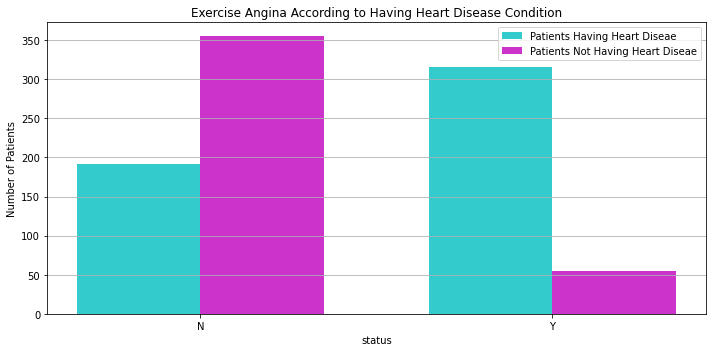

In [ ]:
HavingHeartDisease = crosstab_dfForExerciseAngina.loc[1]
NotHavingHeartDisease = crosstab_dfForExerciseAngina.loc[0]

fig, ax = plt.subplots(1, 1, figsize=(10,5))

index = np.arange(crosstab_dfForExerciseAngina.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, crosstab_dfForExerciseAngina.loc[1], bar_width,
    alpha=opacity,
    color='c',
    label='Patients Having Heart Diseae')
 
rects2 = plt.bar(index + bar_width, crosstab_dfForExerciseAngina.loc[0], bar_width,
    alpha=opacity,
    color='m',
    label='Patients Not Having Heart Diseae')
 
plt.ylabel("Number of Patients")
plt.title("Exercise Angina According to Having Heart Disease Condition")
plt.grid(axis="y")
plt.xlabel('status')
plt.xticks(index + (bar_width / 2), crosstab_dfForExerciseAngina.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_dfForExerciseAngina)
result = "ACCEPTED." if p_value > alpha else "REJECTED."
print(f"NULL HYPOTHESIS {result}")

NULL HYPOTHESIS REJECTED.


ACCORDING TO RESULT;

<br><font color = red> T-Test

<font color = white> 
p-value = 2.907808387659878e-50 
Level of Significance = 0.05
<br>
<br>
<br>
P-VALUE(4.597617450809164e-20) <= ALFA(0.05)
<br>

<br>
<br>
<br>

*    As we continued our research, we plotted the gender distribution of people with the disease and the gender distribution of people who did not have the disease. When we make a ratio according to this graph, we observed that men suffer from heart disease proportionally more than women. As a result, we adjusted our null hypothesis that gender was not effective in having heart disease.

*   We found the p-value using the chi square test method, as we knew that the graph alone would not provide sufficient evidence.



```
As a result, p-value smaller than alfa value so, we reject our null hypothesis. IT MEANS THAT MALE PEOPLE TENDS TO HAVE HEART DISEASE THAN FEMALES.
```

 ## <font color="red"> 4.Hypothesis: CHOLESTROL

 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): People with an average cholesterol level of 200 are less likely to have a heart attack.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): 
People with an average cholesterol level of higher than 200 are more likely to have a heart attack.

In [ ]:
copy_df = df1Copy.copy()
copy_df.dropna(inplace = True)
copy_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Middle-Aged
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
8,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1,Young
11,58,M,ATA,136,164.0,0,ST,99,Y,2.0,Flat,1,Middle-Aged
13,49,M,ASY,140,234.0,0,Normal,140,Y,1.0,Flat,1,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241.0,0,Normal,123,Y,0.2,Flat,1,Middle-Aged
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,Middle-Aged


In [ ]:
test_type = "Cholesterol"

CholesterolForHeartDisease = df1Copy[test_type]  
CholesterolForNoHeartDisease = df2Copy[test_type]

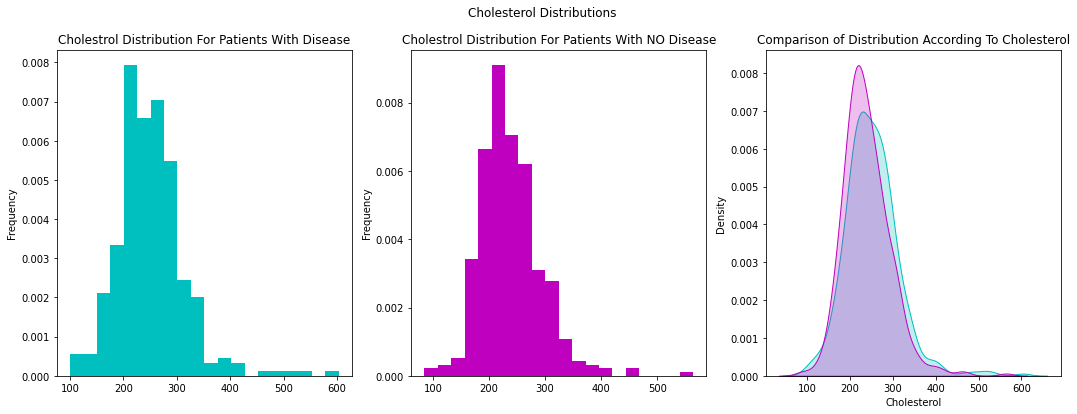

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))  
                                              
        
CholesterolForHeartDisease.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Cholestrol Distribution For Patients With Disease")

CholesterolForNoHeartDisease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Cholestrol Distribution For Patients With NO Disease")

sns.kdeplot(CholesterolForHeartDisease, shade=True, label="completed students", ax=ax[2], color="c")
sns.kdeplot(CholesterolForNoHeartDisease, shade=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison of Distribution According To Cholesterol")

plt.suptitle("Cholesterol Distributions")
plt.show()

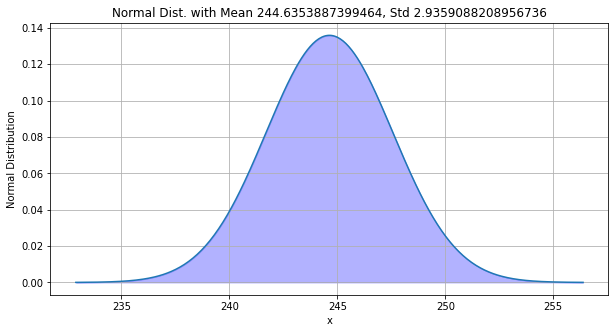

In [ ]:
# mean and std values from the sample
n = 356
mean = dfCopy["Cholesterol"].mean()
std = copy_df["Cholesterol"].std()/(np.sqrt(n))
offset = 4 * std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

In [ ]:
sample_mean = copy_df["Cholesterol"].mean()
z_score = (sample_mean - mean) / std

print("z-score: {}".format(z_score))

z-score: -1.998072259248841


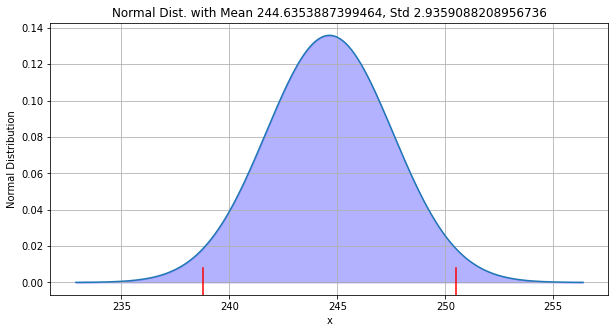

In [ ]:
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,mean,std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='b')
# display the z-score locations
plt.axvline(mean - z_score*std, ymax=0.1, color="red")
plt.axvline(mean + z_score*std, ymax=0.1, color="red")
# annotate the sample mean

plt.title('Normal Dist. with Mean {}, Std {}'.format(mean, std))
plt.show()

In [ ]:
prob = stats.norm.cdf(z_score)

print(f"probability: {prob}")

probability: 0.022854413368362237


ACCORDING TO RESULT;

*    We continued our research with another variable, the cholesterol value. In the graph we drew above, we looked at the distribution of cholesterol values of the groups according to whether they have heart disease or not. According to this distribution, we observed that cholesterol values increased more in people with heart disease, even if values increased in a very low amount.

*    After that, we calculated the place of the cholesterol average of the sample group (people who are sick) in the cholesterol average of the whole population using the z-test.

*    P-value = 0.022 < alfa(0.05) ,so we rejected NULL hypothesis. It is very small differnce so cholesterol do not have effect as much as other variables. The reason for this can be related the outlier. We did not prefer to remove high outliers(except 0) because we have less amount of data and high cholestrol values can be observed.



```
p-value < alfa so we rejected our null hypothesis. According to our Alternative Hypothesis, we decided that if your cholestrol above 200 mg/dl, you tend to have heart disease.
```




 ## <font color="red"> 5.Hypothesis: RestingECG
  <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): The severity of the Resting ECG cannot be used to determine whether people have a heart disease.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): 
Higher level of Resting ECG can be decisive in having heart dicision.

In [ ]:
crosstab_df = df.groupby(['HeartDisease', 'RestingECG']).size().unstack()
crosstab_df

RestingECG,LVH,Normal,ST
HeartDisease,,,
0,82,267,61
1,106,285,117


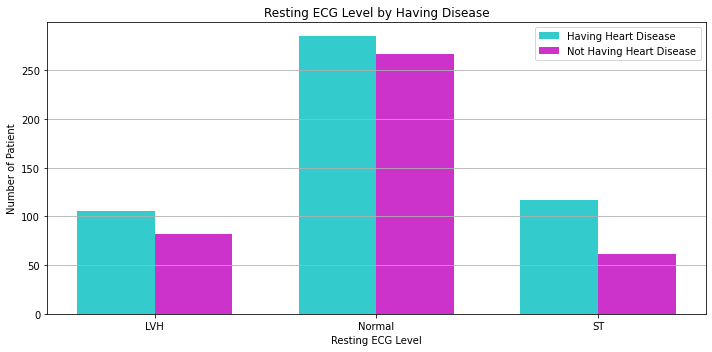

In [ ]:
havingDisease = crosstab_df.loc[1]
notHavingDisease = crosstab_df.loc[0]

fig, ax = plt.subplots(1, 1, figsize=(10,5))

index = np.arange(crosstab_df.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, crosstab_df.loc[1], bar_width,
    alpha=opacity,
    color='c',
    label='Having Heart Disease')
 
rects2 = plt.bar(index + bar_width, crosstab_df.loc[0], bar_width,
    alpha=opacity,
    color='m',
    label='Not Having Heart Disease')
 
plt.ylabel("Number of Patient")
plt.title("Resting ECG Level by Having Disease")
plt.grid(axis="y")
plt.xlabel('Resting ECG Level')
plt.xticks(index + (bar_width / 2), crosstab_df.columns)
plt.legend()
 
plt.tight_layout()
plt.show()   

In [ ]:
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)
result = "ACCEPTED." if p_value > alpha else "REJECTED."
print(f"NULL HYPOTHESIS {result}")

NULL HYPOTHESIS REJECTED.


ACCORDING TO RESULT;

*    When we look at the graph we have drawn according to the distribution of Resting ECG values above, it has been observed that patients with ST values are higher than those who are not sick.

*    For this reason, we established the null hypothesis that Resting ECG is not determinative.

*    P-value > Alfa, so we rejected null Hypothesis.



```
P-value > Alfa, so we rejected null Hypothesis. That's why Resting Ecg determines whether he has a heart condition or not. Especially for the ST condition, this hypothesis is true.
```



 ## <font color="red"> 6.Hypothesis: RESTING BP
 <br>
 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): People with heart disease have a mean Resting BP of 130.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): People with heart disease have a mean Resting BP of bigger than 130.

In [ ]:
test_type = "RestingBP"

RestingBPValuesForHeartDisease = df1Copy[test_type]  
RestingBPValuesForNoHeartDisease = df2Copy[test_type]       

In [ ]:
RestingBPValuesForHeartDisease.mean()

134.18503937007873

In [ ]:
RestingBPValuesForNoHeartDisease.mean()

130.18048780487806

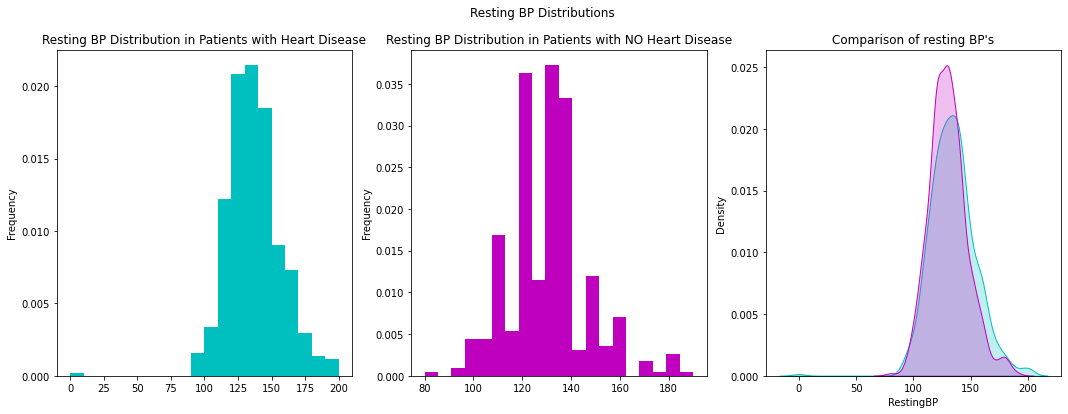

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
RestingBPValuesForHeartDisease.plot(kind="hist", ax=ax[0], bins=20, label="c", color="c", density=True)
ax[0].set_title("Resting BP Distribution in Patients with Heart Disease")

RestingBPValuesForNoHeartDisease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Resting BP Distribution in Patients with NO Heart Disease")

sns.kdeplot(RestingBPValuesForHeartDisease, shade=True, label="Resting BP values Having Heart Disease", ax=ax[2], color="c")
sns.kdeplot(RestingBPValuesForNoHeartDisease, shade=True, label="Resting BP values NOT Having Heart Disease", ax=ax[2], color="m")
ax[2].set_title("Comparison of resting BP's")

plt.suptitle("Resting BP Distributions")
plt.show()

In [ ]:
stats.ttest_ind(RestingBPValuesForHeartDisease, RestingBPValuesForNoHeartDisease, equal_var=False)  # since we have not equal variances

Ttest_indResult(statistic=3.3394915528271034, pvalue=0.0008732264734356625)

ACCORDING TO THE RESULT;


*   After comparing the average of the two different groups, we found that the restingBP averages of the sick people were higher, so we said our null hypothesis that people with an average resting BP value of 130 tend to have heart disease.

*    In the same way, we have seen in the graph that patients with a very small percentage of patients have higher Resting BP values.



```
As a result of the tests, it was seen that the p-value was smaller than the alpha value. For this reason, the alternative hypothesis was accepted. In this case, people with an average Resting BP above 130 have a tendency to have heart disease.
```



## <font color="red"> 7.Hypothesis: MAX HR
 <br>
 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$): The people whose Max HR values mean higher than 127 have tendency to have a heart disease.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): The people whose Max HR values mean equals to 127 have tendency to have a heart disease.

In [ ]:
test_type = "MaxHR"

MaxHRForHeartDisease = df1Copy[test_type]  
MaxHRForNoHeartDisease = df2Copy[test_type]       

In [ ]:
MaxHRForHeartDisease.mean()

127.65551181102362

In [ ]:
MaxHRForNoHeartDisease.mean()

148.15121951219513

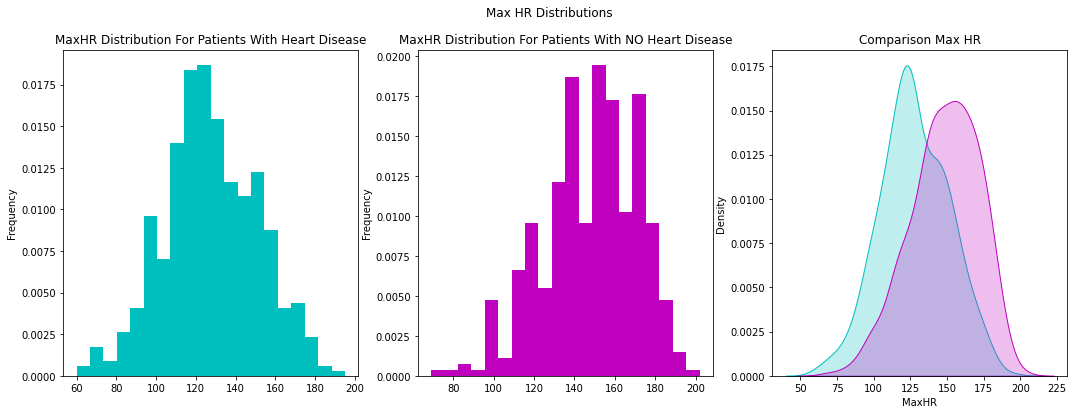

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
MaxHRForHeartDisease.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("MaxHR Distribution For Patients With Heart Disease")

MaxHRForNoHeartDisease.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("MaxHR Distribution For Patients With NO Heart Disease")

sns.kdeplot(MaxHRForHeartDisease, shade=True, label="completed students", ax=ax[2], color="c")
sns.kdeplot(MaxHRForNoHeartDisease, shade=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison Max HR")

plt.suptitle("Max HR Distributions")
plt.show()

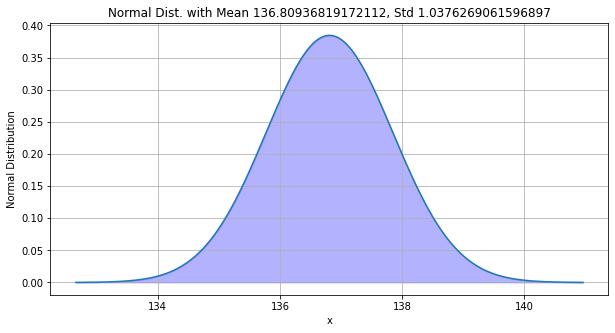

In [ ]:
# mean and std values from the sample
n = 508
mean = dfCopy["MaxHR"].mean()
std = df1Copy["MaxHR"].std()/(np.sqrt(n))
offset = 4 * std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

In [ ]:
sample_mean = df1Copy["MaxHR"].mean()
z_score = (sample_mean - mean) / std

print("z-score: {}".format(z_score))

z-score: -8.821915012378


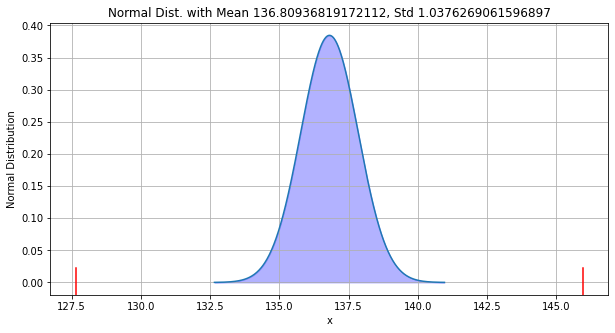

In [ ]:
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x,mean,std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.fill_between(x, y, alpha=0.3, color='b')
# display the z-score locations
plt.axvline(mean - z_score*std, ymax=0.1, color="red")
plt.axvline(mean + z_score*std, ymax=0.1, color="red")
# annotate the sample mean

plt.title('Normal Dist. with Mean {}, Std {}'.format(mean, std))
plt.show()

In [ ]:
prob = stats.norm.cdf(z_score)

print(f"probability: {prob}")

probability: 5.625931978927962e-19


In [ ]:
stats.ttest_ind(MaxHRForHeartDisease, MaxHRForNoHeartDisease, equal_var=False)

Ttest_indResult(statistic=-13.231478436446507, pvalue=1.430637488787276e-36)

ACCORDING TO RESULT;

*   As we continued our research, we observed that the distribution of Max HR values may also be a determinant of whether or not to have heart disease. According to the graphic we have drawn above, we observed that the Max HR distribution of people with not having disease is higher than people who have the disease.

*   When we look at the average distribution of the two groups using the t-test, and when we look at the distribution of the mean HR of the healthy people within the population mean, it is seen that people with high Max HR values tend to be much healthier. 

*   When we looked the graph, we observed that helthier people have higher Max HR value so we rjected NUll Hypothesis. People with higher Max HR values have more tendency to be healthy.

```
As a result, the p-values we found through tests are considerably smaller than the alpha value. For this reason, if the Max HR value is above 127 by rejecting our null hypothesis, people are likely to not have heart disease.
```



## <font color="red"> 8.Hypothesis: FASTING BS
 <br>
 <font color="white">
  <b>Null Hypothesis</b> ($\large{H_0}$):Fasting BS is not decisive in people with heart disease.
  <br>
 <b>Alternative Hypothesis</b> ($\large{H_A}$): Fasting BS is observed more frequently in people with heart disease.

In [ ]:
crosstab_dfForFastingBS = df.groupby(['HeartDisease', 'FastingBS']).size().unstack()
crosstab_dfForFastingBS


FastingBS,0,1
HeartDisease,,
0,366,44
1,338,170


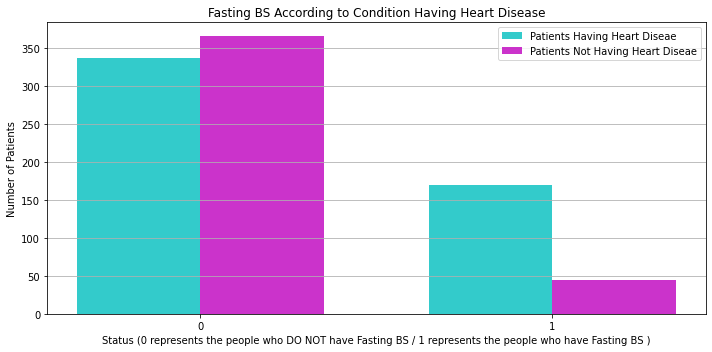

In [ ]:
HavingHeartDisease = crosstab_dfForFastingBS.loc[1]
NotHavingHeartDisease = crosstab_dfForFastingBS.loc[0]

fig, ax = plt.subplots(1, 1, figsize=(10,5))

index = np.arange(crosstab_dfForFastingBS.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, crosstab_dfForFastingBS.loc[1], bar_width,
    alpha=opacity,
    color='c',
    label='Patients Having Heart Diseae')
 
rects2 = plt.bar(index + bar_width, crosstab_dfForFastingBS.loc[0], bar_width,
    alpha=opacity,
    color='m',
    label='Patients Not Having Heart Diseae')
 
plt.ylabel("Number of Patients")
plt.title("Fasting BS According to Condition Having Heart Disease")
plt.grid(axis="y")
plt.xlabel('Status (0 represents the people who DO NOT have Fasting BS / 1 represents the people who have Fasting BS )' )
plt.xticks(index + (bar_width / 2), crosstab_dfForFastingBS.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_dfForFastingBS)
result = "ACCEPTED." if p_value > alpha else "REJECTED."
print(f"NULL HYPOTHESIS {result}")

NULL HYPOTHESIS REJECTED.



*   As far as we can observe from the graphics, we see that the rate of people diagnosed with Fasting BS is much higher in sick people. For this reason, we determined our null hypothesis as that the rate of Fasting BS in sick people is low.



```
As a result, we rejected our Null hypothesis because our p-value was considerably smaller than the alpha value in the tests performed. As a result, we observed a higher probability of being diagnosed with Fasting BS in sick people.
```





## <font color="red"> GENERAL RESULT
 <br>
 <font color="white">

In [ ]:
corrs = dfCopy.corr()
corrs

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,0.058758,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.095939,0.070193,-0.112135,0.164803,0.107589
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.198039,0.070193,0.054012,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,-0.019856,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.058488,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,0.103866,0.267291,-0.400421,0.403951,1.000000


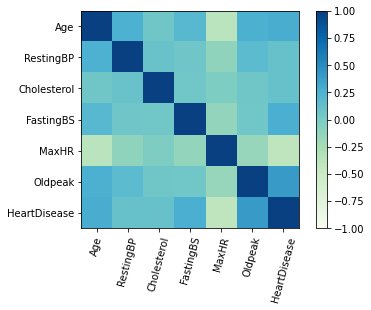

In [ ]:
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

*  Based on the covariance relationships we examined above, we found that most of our hypotheses (Max HR is quite low) are associated with having a heart disease. As seen on the heat map, MaxHR have negative covariance with heart disease. When MaxHR is getting bigger, we get more healthier people.

# Machine Learning
*   In this part of the project, as a group we will create use Machine Learning approaches to create a model which predicts the probabality of having heart disease.

## <font color='red'>kNN Inputing 

*    In this section, we used kNN ınputing method to create model based on age, gender, cholestrol and RestingBp. We divide our dataframe into 6 different group.



> 1. Group: Male and Labeled as Young Age
> 2. Group: Male and Labeled as Middle-Aged
> 3. Group: Male and Labeled as Elderly
> 4. Group: Female and Labeled as Young Age
> 5. Group: Female and Labeled as Middle-Aged
> 6. Group: Female and Labeled as Elderly

In these Groups, kNN Inputing algortihm tried to split group into 2 different group which shows the heart disease condition according to relationship between Resying BP and Cholesterol. Every single algorithm shows this condition according to sex and age.
We select this information because we observed in Hypothesis Testing section gender and age can be decisive in heart disease. Therefore, we grouped our sample according to different gender and ages. After that we observed RestingBP and Cholesterol relation between the groups who has heart disease or not.

* Accuracy Results According To K value
> 1. Group: Male and Labeled as Young Age => 0.916 / k = 3
> 2. Group: Male and Labeled as Middle-Aged => 0.63 / k = 12
> 3. Group: Male and Labeled as Elderly => 0.85 / k=3
> 4. Group: Female and Labeled as Young Age => 0.75 / k = 2
> 5. Group: Female and Labeled as Middle-Aged => 0.78 / k = 12
> 6. Group: Female and Labeled as Elderly 1/ k = 1




```
As a result, Some of the groups have sucessful kNN inputing. However, some of them has Accuracy Result = 1 for certain k values. It shows us this k values unsucessfull test.
For example, in group 6 we have accuracy result which equals 1. Therefore, it is not healthy to use this group to decide wihch person have heart disease. This problems can be solved by extending our data frames.
```





In [ ]:
copy_df = dfCopy.copy()
copy_df.dropna(inplace = True)
copy_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,Young
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Middle-Aged
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,Young
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,Middle-Aged
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,Middle-Aged


In [ ]:
df_male = copy_df[copy_df["Sex"] == "M"]
df_male

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,Young
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,Young
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Middle-Aged
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0,Young
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,M,ASY,164,176.0,1,LVH,90,N,1.0,Flat,1,Middle-Aged
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,Middle-Aged


In [ ]:
df_female = copy_df[copy_df["Sex"] == "F"]
df_female

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Middle-Aged
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,Middle-Aged
9,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0,Middle-Aged
10,37,F,NAP,130,211.0,0,Normal,142,N,0.0,Up,0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,58,F,ASY,170,225.0,1,LVH,146,Y,2.8,Flat,1,Middle-Aged
906,55,F,ATA,132,342.0,0,Normal,166,N,1.2,Up,0,Middle-Aged
909,63,F,ASY,124,197.0,0,Normal,136,Y,0.0,Flat,1,Middle-Aged
912,57,F,ASY,140,241.0,0,Normal,123,Y,0.2,Flat,1,Middle-Aged


In [ ]:
df_male_young =df_male[df_male["AgeCategory"] == "Young"]
df_male_young = df_male_young[["RestingBP","Cholesterol","HeartDisease"]]
df_male_young

,RestingBP,Cholesterol,HeartDisease
0,140,289.0,0
2,130,283.0,0
5,120,339.0,0
8,140,207.0,1
12,120,204.0,0
...,...,...,...
887,132,247.0,1
898,122,192.0,0
907,120,169.0,1
910,120,157.0,0


In [ ]:
df_male_middle_aged =df_male[df_male["AgeCategory"] == "Middle-Aged"]
df_male_middle_aged = df_male_middle_aged[["RestingBP","Cholesterol","HeartDisease"]]
df_male_middle_aged

,RestingBP,Cholesterol,HeartDisease
4,150,195.0,0
7,110,208.0,0
11,136,164.0,1
13,140,234.0,1
18,100,248.0,1
...,...,...,...
904,120,240.0,0
908,140,187.0,1
911,164,176.0,1
913,110,264.0,1


In [ ]:
df_male_elderly =df_male[df_male["AgeCategory"] == "Elderly"]
df_male_elderly = df_male_elderly[["RestingBP","Cholesterol","HeartDisease"]]
df_male_elderly

,RestingBP,Cholesterol,HeartDisease
36,140,306.0,1
85,140,139.0,1
86,170,263.0,1
100,130,275.0,1
420,110,213.0,0
...,...,...,...
855,180,274.0,1
861,110,248.0,1
884,160,286.0,1
905,152,212.0,1


In [ ]:
df_female_young =df_female[df_female["AgeCategory"] == "Young"]
df_female_young = df_female_young[["RestingBP","Cholesterol","HeartDisease"]]
df_female_young

,RestingBP,Cholesterol,HeartDisease
10,130,211.0,0
14,115,211.0,0
17,120,201.0,0
20,100,223.0,0
34,150,186.0,0
37,110,250.0,0
53,130,245.0,0
61,150,254.0,0
65,120,260.0,0
73,120,218.0,0


In [ ]:
df_female_middle_aged =df_female[df_female["AgeCategory"] == "Middle-Aged"]
df_female_middle_aged = df_female_middle_aged[["RestingBP","Cholesterol","HeartDisease"]]
df_female_middle_aged

,RestingBP,Cholesterol,HeartDisease
1,160,180.0,1
3,138,214.0,1
6,130,237.0,0
9,120,284.0,0
15,120,273.0,0
...,...,...,...
901,170,225.0,1
906,132,342.0,0
909,124,197.0,1
912,140,241.0,1


In [ ]:
df_female_elderly =df_female[df_female["AgeCategory"] == "Elderly"]
df_female_elderly = df_female_elderly[["RestingBP","Cholesterol","HeartDisease"]]
df_female_elderly

,RestingBP,Cholesterol,HeartDisease
616,115,564.0,0
619,120,269.0,0
630,112,149.0,0
644,110,265.0,0
664,150,225.0,1
667,140,417.0,0
688,140,197.0,0
689,106,223.0,0
733,150,226.0,0
738,160,360.0,0


In [ ]:
X = df_male_young.drop("HeartDisease", axis=1)
y = df_male_young["HeartDisease"]
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

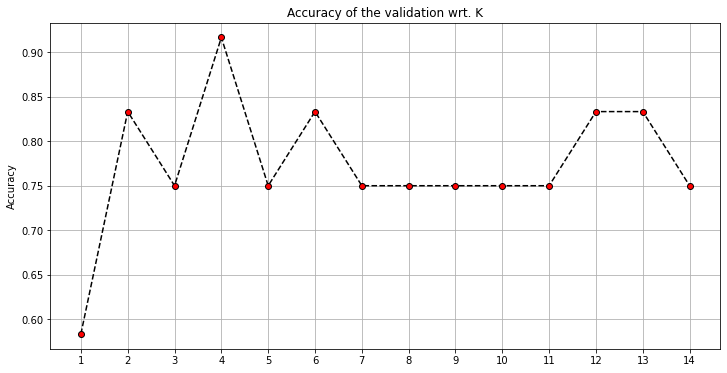

In [ ]:
K_range = np.arange(1,15)
accuracy_list = []

for k in K_range:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy  = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

plt.figure(figsize=(12,6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy of the validation wrt. K")
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
accuracy_list[3]

0.9166666666666666

In [ ]:
X = df_male_middle_aged.drop("HeartDisease", axis=1)
y = df_male_middle_aged["HeartDisease"]
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

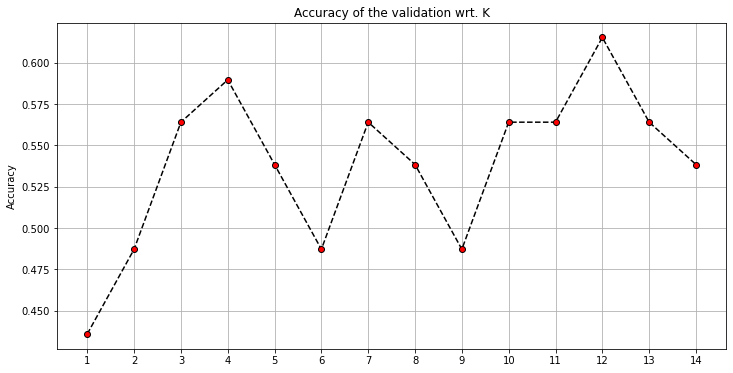

In [ ]:
K_range = np.arange(1,15)
accuracy_list = []

for k in K_range:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy  = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

plt.figure(figsize=(12,6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy of the validation wrt. K")
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
X = df_male_elderly.drop("HeartDisease", axis=1)
y = df_male_elderly["HeartDisease"]
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

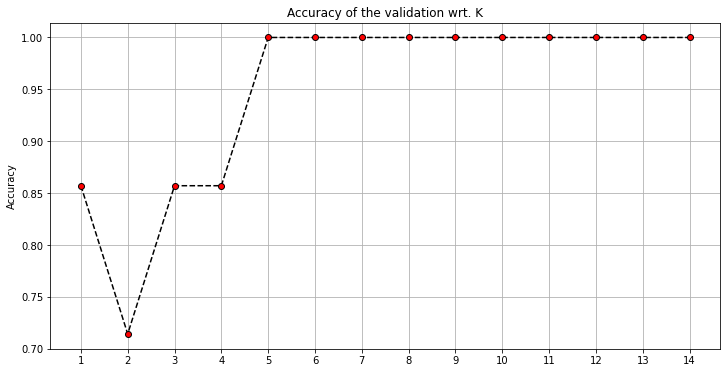

In [ ]:
K_range = np.arange(1,15)
accuracy_list = []

for k in K_range:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy  = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

plt.figure(figsize=(12,6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy of the validation wrt. K")
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
X = df_female_young.drop("HeartDisease", axis=1)
y = df_female_young["HeartDisease"]
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

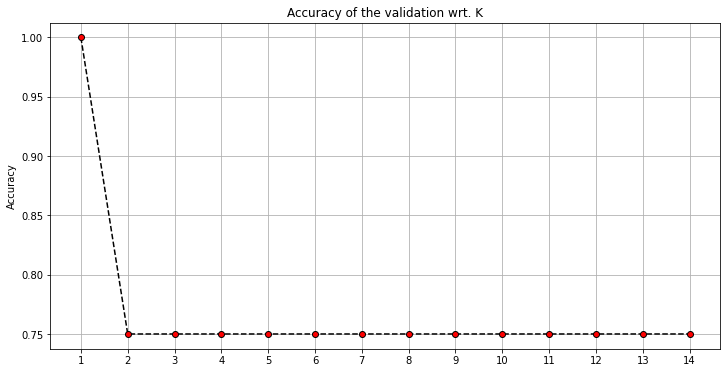

In [ ]:
K_range = np.arange(1,15)
accuracy_list = []

for k in K_range:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy  = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

plt.figure(figsize=(12,6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy of the validation wrt. K")
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
X = df_female_middle_aged.drop("HeartDisease", axis=1)
y = df_female_middle_aged["HeartDisease"]
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

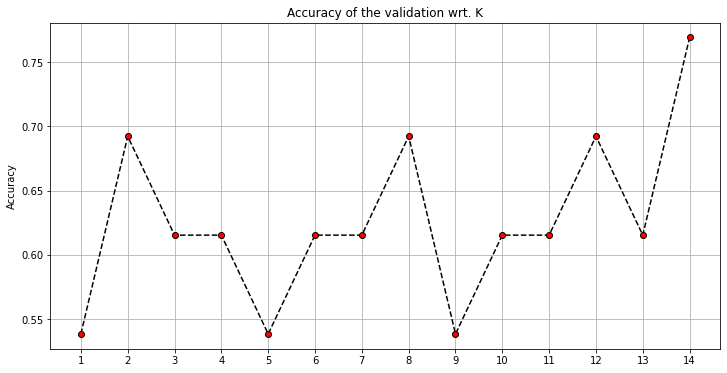

In [ ]:
K_range = np.arange(1,15)
accuracy_list = []

for k in K_range:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy  = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

plt.figure(figsize=(12,6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy of the validation wrt. K")
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
X = df_female_elderly.drop("HeartDisease", axis=1)
y = df_female_elderly["HeartDisease"]
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

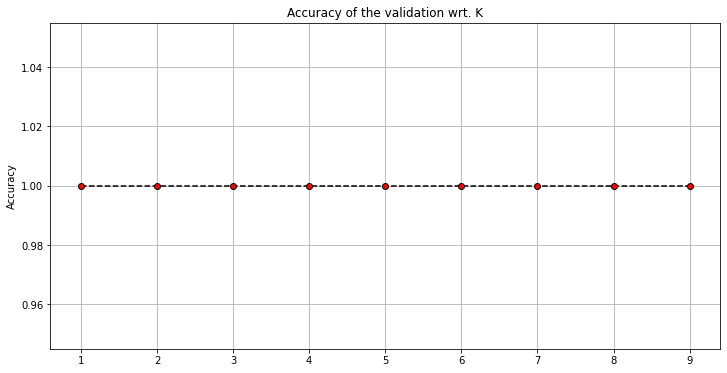

In [ ]:
K_range = np.arange(1,10)
accuracy_list = []

for k in K_range:
    knn = KNeighborsClassifier(k, metric = "euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy  = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

plt.figure(figsize=(12,6))
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy of the validation wrt. K")
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

##<font color='red'>Decision Trees

* In this section, we will try to determine whether a person has a heart condition or not with which data is best by creating decision trees according to some categories.



> 1. DECISION TREE: CHEST PAIN TYPE - AGE /  HAVING HEART DISEASE
> 2. DECISION TREE: CHOLESTEROL - AGE - OLDPEAK / HAVING HEART DISEASE
>3. DECISION TREE: ST SLOPE - AGE / HAVING HEART DISEASE





In [ ]:
!pip install graphviz

!pip install pydotplus

!pip install --upgrade scikit-learn==0.20.3

### Converting Categorical Data in Dataframes to Numeric Values

In this section, we convert categorical values into numerical values because in decision tree section we need to numerical values to evaluate result. After coverting values we decided to not use gender in decision tree because the result based on the average of cetain values and we are not able to evaluate gender with average.

<font color="red">Resting ECG  => <font color="white"> LVH = 0 / Normal = 1 /ST = 2 
<br>
<font color="red">Sex => <font color="white"> M = 0 / F = 1
<br>
<font color="red">Chest Pain Type => <font color="white"> "NAP" = 0 /  "TA" ,1 /  "ATA" = 2 / "ASY" = 3 
<br>
<font color="red">ST_Slope => <font color="white">"Flat" = 1 / "Down" = 0 / "Up" = 2 
<br>
<font color="red">IMPORTANT NOTE: <font color="white">These values decided according to the severity of pain or by marking the values which represents "low cases" with 0.



In [ ]:
dfCopy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,0,140,289.0,0,Normal,172,N,0.0,Up,0,Young
1,49,F,1,160,180.0,0,Normal,156,N,1.0,Flat,1,Middle-Aged
2,37,M,0,130,283.0,0,ST,98,N,0.0,Up,0,Young
3,48,F,2,138,214.0,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
4,54,M,1,150,195.0,0,Normal,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264.0,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,2,144,193.0,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,2,130,131.0,0,Normal,115,Y,1.2,Flat,1,Middle-Aged
916,57,F,0,130,236.0,0,LVH,174,N,0.0,Flat,1,Middle-Aged


In [ ]:
dfCopy["ChestPainType"].unique()

array([0, 1, 2, 3])

In [ ]:
dfnewCopy1=dfCopy

In [ ]:
dfReplaced = dfnewCopy1.replace("ATA",2)
dfReplaced = dfnewCopy1.replace("NAP",0)
dfReplaced = dfnewCopy1.replace("TA",1)
dfReplaced = dfnewCopy1.replace("ASY",3)

dfReplaced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,0,140,289.0,0,Normal,172,N,0.0,Up,0,Young
1,49,F,1,160,180.0,0,Normal,156,N,1.0,Flat,1,Middle-Aged
2,37,M,0,130,283.0,0,ST,98,N,0.0,Up,0,Young
3,48,F,2,138,214.0,0,Normal,108,Y,1.5,Flat,1,Middle-Aged
4,54,M,1,150,195.0,0,Normal,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264.0,0,Normal,132,N,1.2,Flat,1,Middle-Aged
914,68,M,2,144,193.0,1,Normal,141,N,3.4,Flat,1,Elderly
915,57,M,2,130,131.0,0,Normal,115,Y,1.2,Flat,1,Middle-Aged
916,57,F,0,130,236.0,0,LVH,174,N,0.0,Flat,1,Middle-Aged


In [ ]:
dfReplaced = dfReplaced.replace("LVH",0)
dfReplaced = dfReplaced.replace("Normal",1)
dfReplaced = dfReplaced.replace("ST",2)

dfReplaced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,M,0,140,289.0,0,1,172,N,0.0,Up,0,Young
1,49,F,1,160,180.0,0,1,156,N,1.0,Flat,1,Middle-Aged
2,37,M,0,130,283.0,0,2,98,N,0.0,Up,0,Young
3,48,F,2,138,214.0,0,1,108,Y,1.5,Flat,1,Middle-Aged
4,54,M,1,150,195.0,0,1,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,3,110,264.0,0,1,132,N,1.2,Flat,1,Middle-Aged
914,68,M,2,144,193.0,1,1,141,N,3.4,Flat,1,Elderly
915,57,M,2,130,131.0,0,1,115,Y,1.2,Flat,1,Middle-Aged
916,57,F,0,130,236.0,0,0,174,N,0.0,Flat,1,Middle-Aged


In [ ]:
dfReplaced = dfReplaced.replace("M",0)
dfReplaced = dfReplaced.replace("F",1)
dfReplaced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,0,0,140,289.0,0,1,172,N,0.0,Up,0,Young
1,49,1,1,160,180.0,0,1,156,N,1.0,Flat,1,Middle-Aged
2,37,0,0,130,283.0,0,2,98,N,0.0,Up,0,Young
3,48,1,2,138,214.0,0,1,108,Y,1.5,Flat,1,Middle-Aged
4,54,0,1,150,195.0,0,1,122,N,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264.0,0,1,132,N,1.2,Flat,1,Middle-Aged
914,68,0,2,144,193.0,1,1,141,N,3.4,Flat,1,Elderly
915,57,0,2,130,131.0,0,1,115,Y,1.2,Flat,1,Middle-Aged
916,57,1,0,130,236.0,0,0,174,N,0.0,Flat,1,Middle-Aged


In [ ]:
dfReplaced = dfReplaced.replace("N",0,)
dfReplaced = dfReplaced.replace("Y",1)
dfReplaced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,0,0,140,289.0,0,1,172,0,0.0,Up,0,Young
1,49,1,1,160,180.0,0,1,156,0,1.0,Flat,1,Middle-Aged
2,37,0,0,130,283.0,0,2,98,0,0.0,Up,0,Young
3,48,1,2,138,214.0,0,1,108,1,1.5,Flat,1,Middle-Aged
4,54,0,1,150,195.0,0,1,122,0,0.0,Up,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264.0,0,1,132,0,1.2,Flat,1,Middle-Aged
914,68,0,2,144,193.0,1,1,141,0,3.4,Flat,1,Elderly
915,57,0,2,130,131.0,0,1,115,1,1.2,Flat,1,Middle-Aged
916,57,1,0,130,236.0,0,0,174,0,0.0,Flat,1,Middle-Aged


In [ ]:
dfReplaced["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
dfReplaced = dfReplaced.replace("Up",2)
dfReplaced = dfReplaced.replace("Flat",1)
dfReplaced = dfReplaced.replace("Down",0)
dfReplaced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,0,0,140,289.0,0,1,172,0,0.0,2,0,Young
1,49,1,1,160,180.0,0,1,156,0,1.0,1,1,Middle-Aged
2,37,0,0,130,283.0,0,2,98,0,0.0,2,0,Young
3,48,1,2,138,214.0,0,1,108,1,1.5,1,1,Middle-Aged
4,54,0,1,150,195.0,0,1,122,0,0.0,2,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264.0,0,1,132,0,1.2,1,1,Middle-Aged
914,68,0,2,144,193.0,1,1,141,0,3.4,1,1,Elderly
915,57,0,2,130,131.0,0,1,115,1,1.2,1,1,Middle-Aged
916,57,1,0,130,236.0,0,0,174,0,0.0,1,1,Middle-Aged


In [ ]:
dfReplaced.dropna(inplace=True)
dfReplaced

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeCategory
0,40,0,0,140,289.0,0,1,172,0,0.0,2,0,Young
1,49,1,1,160,180.0,0,1,156,0,1.0,1,1,Middle-Aged
2,37,0,0,130,283.0,0,2,98,0,0.0,2,0,Young
3,48,1,2,138,214.0,0,1,108,1,1.5,1,1,Middle-Aged
4,54,0,1,150,195.0,0,1,122,0,0.0,2,0,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264.0,0,1,132,0,1.2,1,1,Middle-Aged
914,68,0,2,144,193.0,1,1,141,0,3.4,1,1,Elderly
915,57,0,2,130,131.0,0,1,115,1,1.2,1,1,Middle-Aged
916,57,1,0,130,236.0,0,0,174,0,0.0,1,1,Middle-Aged


### 1. CHEST PAIN TYPE - AGE /  HAVING HEART DISEASE

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#split dataset in features and target variable
feature_cols = ['ChestPainType','Age']
X = dfReplaced[feature_cols] # Features
y = dfReplaced['HeartDisease'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7717391304347826


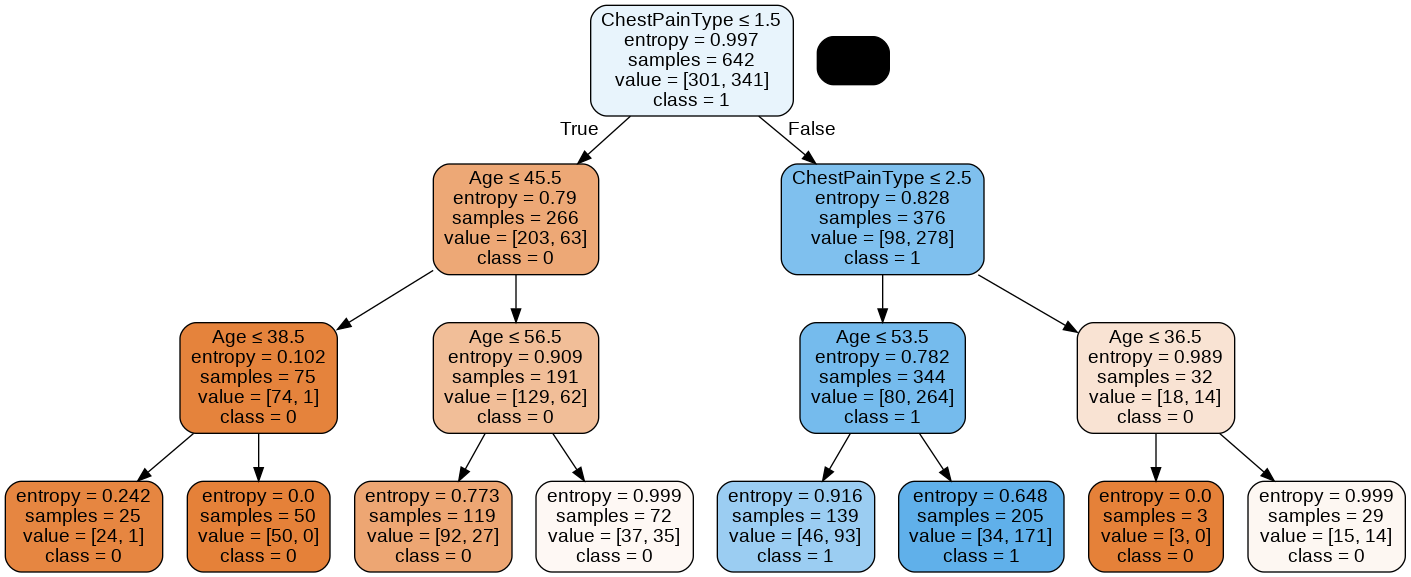

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heartdisease.png')
Image(graph.create_png())

*   As a result, we created decision tree according to patients' Chest Pain Type and Age. This makes possible to decide according to the chest pain types and age of the patients, the probability of having heart disease can be measured with an accuracy of 77 percent.

*  We chose these features because age and chest pain types were used in separate hypothesis tests to decide whether a person has a heart condition or not. We thought we would get a more precise result by combining the data used separately.



```
As a conclusion, if we got the patients' age and chest pain type we can predict the probability of having heart disease wtih 77% accuracy
```



### 2- CHOLESTEROL - AGE - OLDPEAK / HAVING HEART DISEASE

In [ ]:
#split dataset in features and target variable
feature_cols = ['Age','Oldpeak']
X = dfReplaced[feature_cols] # Features
y = dfReplaced['HeartDisease'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


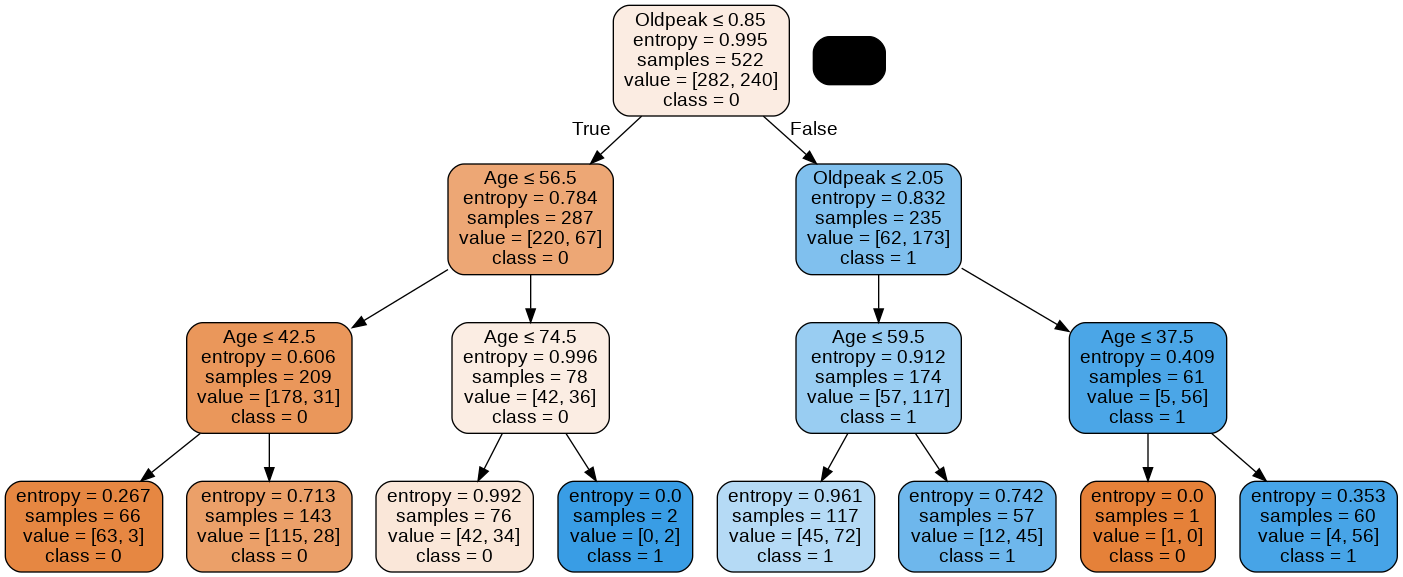

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('HeartDisease.png')
Image(graph.create_png())

*   We choose  Age and Oldpeak values because in statistical testing section (heat table), we  relaize that the most effective features that are related to Heart Disease. We choose Age because they have high privelage on deciding Heart Disease on Hypothesis testing part.

*   Oldpeak value shows that ST depression induced by exercise relative to rest. We decided to not use Old Peak but we changed our mind after looking Heat Map in Hypotesis Testing Part.

```
As a reult we can predict whether people have heart disease or not by using their Oldpeak and Age values with %75 Accuracy.
```



###3. ST SLOPE - AGE / HAVING HEART DISEASE

In [ ]:
#split dataset in features and target variable
feature_cols = ['ST_Slope','Age']
X = dfReplaced[feature_cols] # Features
y = dfReplaced['HeartDisease'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8214285714285714


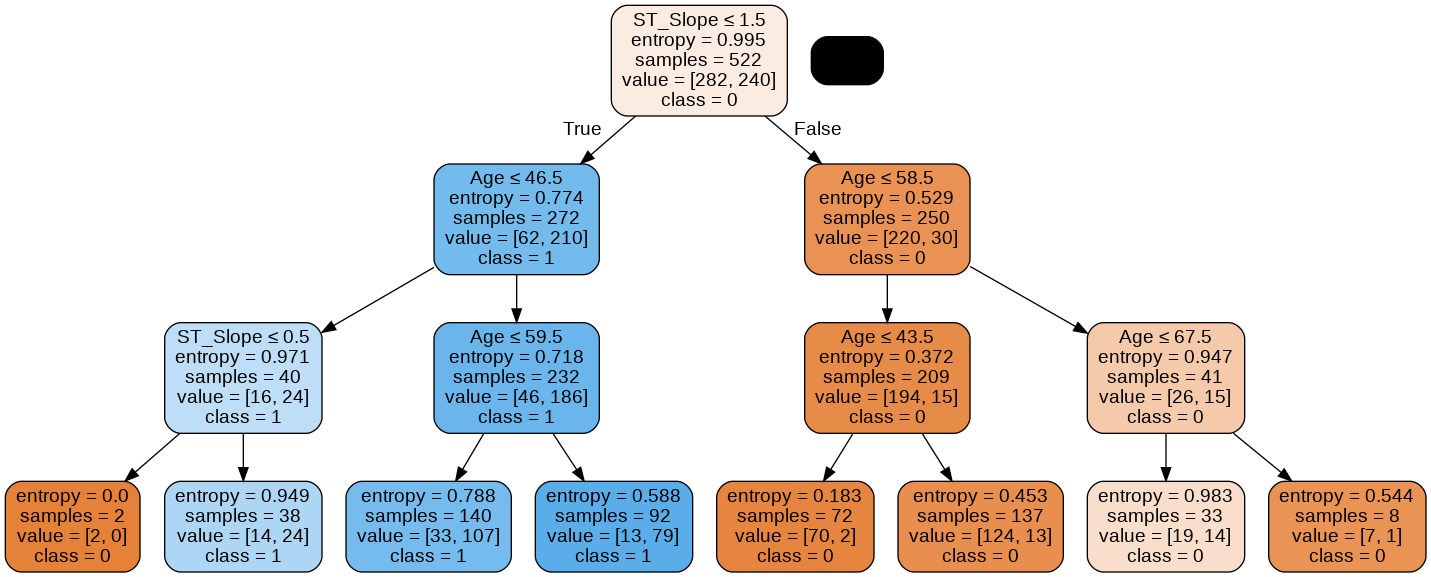

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

*   In this section, we choose ST_Slope and  Age to create Decision Tree. We turned ST_Slope into numerical value and numarical values represents the slope of ST. When the ST-slope number increased the slope of the ST will indrease. The ST segment represnets shift relative to exercise-induced increments in heart rate.



```
As a result, we can identify the people who have heart disease by looking their age and ST Slope rate with accuracy of %82. This is very high rate to identify something.
```



# CONCLUSION AND RECOMMENDATION


* As a conclusion, if we have certain data such as Gender, Age, Cholesterol, RestingBP, Chest Pain Type, Resting ECG etc. we can detect the people who may have heart disease with a high accuracy. We also detected that most of the background information are correct.
* As a recommendation, we can say that this model also extended with the help of symptoms. It will put more accurracy when we add symptom analysis.
  
<br>
